In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import linalg as splinalg
from scipy.sparse import csr_matrix, issparse
import scipy.sparse as sparse
import sys
from IPython.core.display import display, HTML
import time

In [2]:
def ler_mtx(nome_arquivo):
    
    def split_convert(x, matriz, s=False):
        x,y,val = list(filter(None, x.split(' ')))
        x = int(x)-1
        y = int(y)-1
        val = np.float64(val)
        matriz[x, y] = val
        if s:
            matriz[y, x] = val
    
    f = open(nome_arquivo, 'r')
    tipo = f.readline()[:-1]
    qtd_linhas, qtd_colunas = list(map(int, f.readline().split(" ")[:-1]))
    matriz = np.zeros((qtd_linhas, qtd_colunas), dtype=np.float64)
    if tipo == 'ComSimetria':
        [split_convert(x, matriz, s=True) for x in f.readlines()]
    if tipo == 'SemSimetria':
        [split_convert(x, matriz) for x in f.readlines()]
    return matriz

def ler_vet(nome_arquivo):
    f = open(nome_arquivo, 'r')
    size = int(f.readline())
    b = np.array([np.float64(x) for x in f.readlines()])
    return b.reshape((-1,1))


def executa(A, b, f, metodo, sol):
    try:
        ini = time.time()
        x = f(A,b).reshape((-1,1))
        xs = np.arange(x.shape[0])
        end = time.time()
        plt.plot(xs, np.absolute(sol-x), label=metodo)
        return "{0:.6E}".format(np.linalg.norm(sol-x, 2)) + ' -> tempo: ' + "{0:.8f}".format(end-ini) + 's'
    except np.linalg.LinAlgError as e:
        return str(e)

def sparse_cholesky(A):
  
  n = A.shape[0]
  LU = splinalg.splu(A,diag_pivot_thresh=0) # sparse LU decomposition
  
#   if ( LU.perm_r == np.arange(n) ).all() and ( LU.U.diagonal() > 0 ).all(): # check the matrix A is positive definite.
  return LU.L.dot( sparse.diags(LU.U.diagonal()**0.5) )
#   else:
#     raise np.linalg.LinAlgError('The matrix is not positive definite')
    
def MMQ_cholesky(A,b):
    At = A.transpose()
    B = At.dot(A)
    y = At.dot(b)
    G = sparse_cholesky(B)
    Gt = G.transpose()
    z = splinalg.spsolve(G, y)
    x = splinalg.spsolve(Gt, z)
    return x
def MMQ_LU(A,b):
    LU = splinalg.splu(A,diag_pivot_thresh=0)
    y = splinalg.spsolve(LU.L, b)
    x = splinalg.spsolve(LU.U, y)
    return x


def exibir(problemas):
    for p in problemas:
        p = str(p)
        display(HTML('<h1>Problema '+p+'</h1>'))
        A = ler_mtx('Matrizes/Problema'+p+'/Matriz'+p+'.mtx') # com simetria
        b = ler_vet('Matrizes/Problema'+p+'/VetorIndependente'+p+'.vet')
        x = ler_vet('Matrizes/Problema'+p+'/VetorSolucao'+p+'.vet')
        
        plt.figure(figsize=(20,20))
        plt.spy(A, precision=1e-20, markersize=1)
        plt.show()
        
        A = csr_matrix(A)
        
        plt.figure(figsize=(20,10))
        print('Erro Cholesky: ',  executa(A, b, MMQ_cholesky, 'Cholesky', x))
        print('Erro QR      : ',  executa(A, b, MMQ_LU, 'QR', x))
        print('Erro Nativo  : ',  executa(A, b, splinalg.spsolve, 'Nativo', x))
        plt.legend(loc="upper left")
        plt.title('Erros')
        plt.yscale('log')
        plt.show()
        
        display(HTML('<br><hr/><br>'))

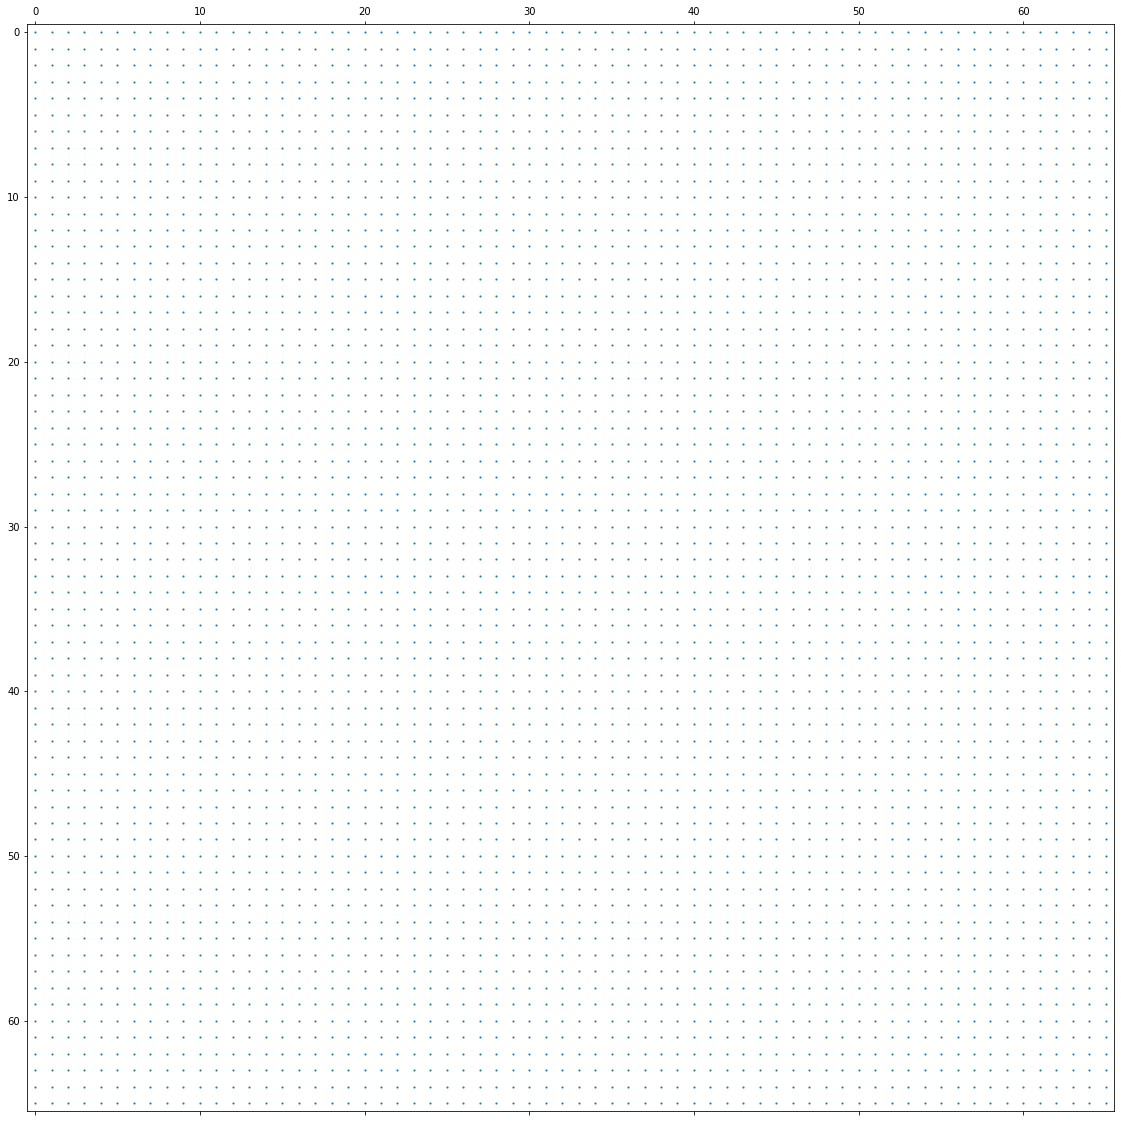

Erro Cholesky:  2.622498E-10 -> tempo: 0.00254488s
Erro QR      :  3.019586E-13 -> tempo: 0.00186038s
Erro Nativo  :  3.019571E-13 -> tempo: 0.00031638s


/home/parafuso828/.local/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


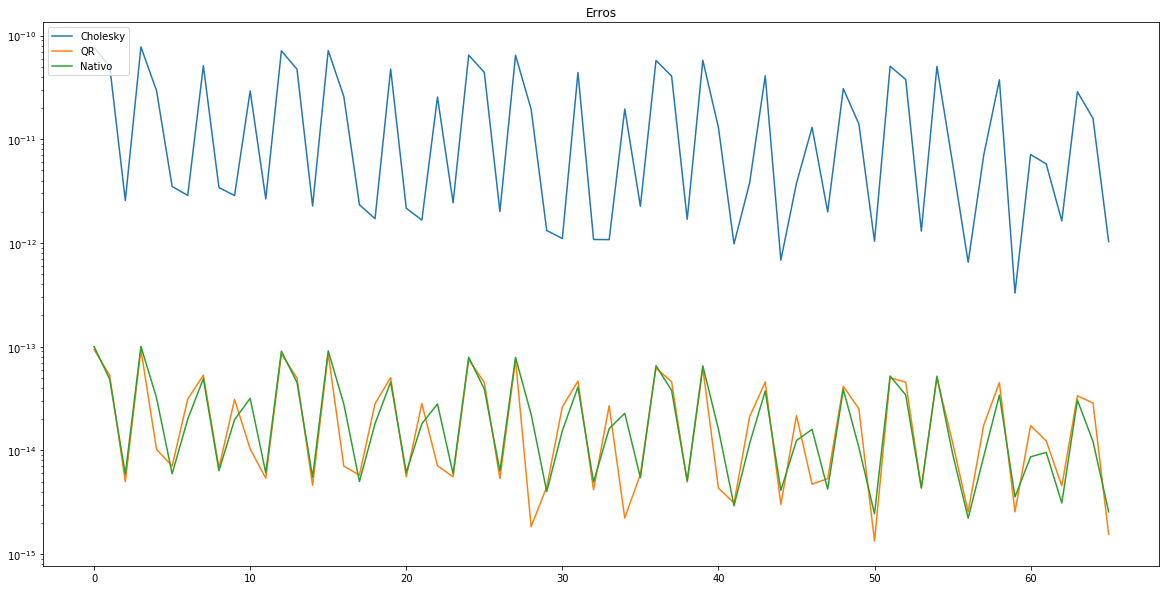

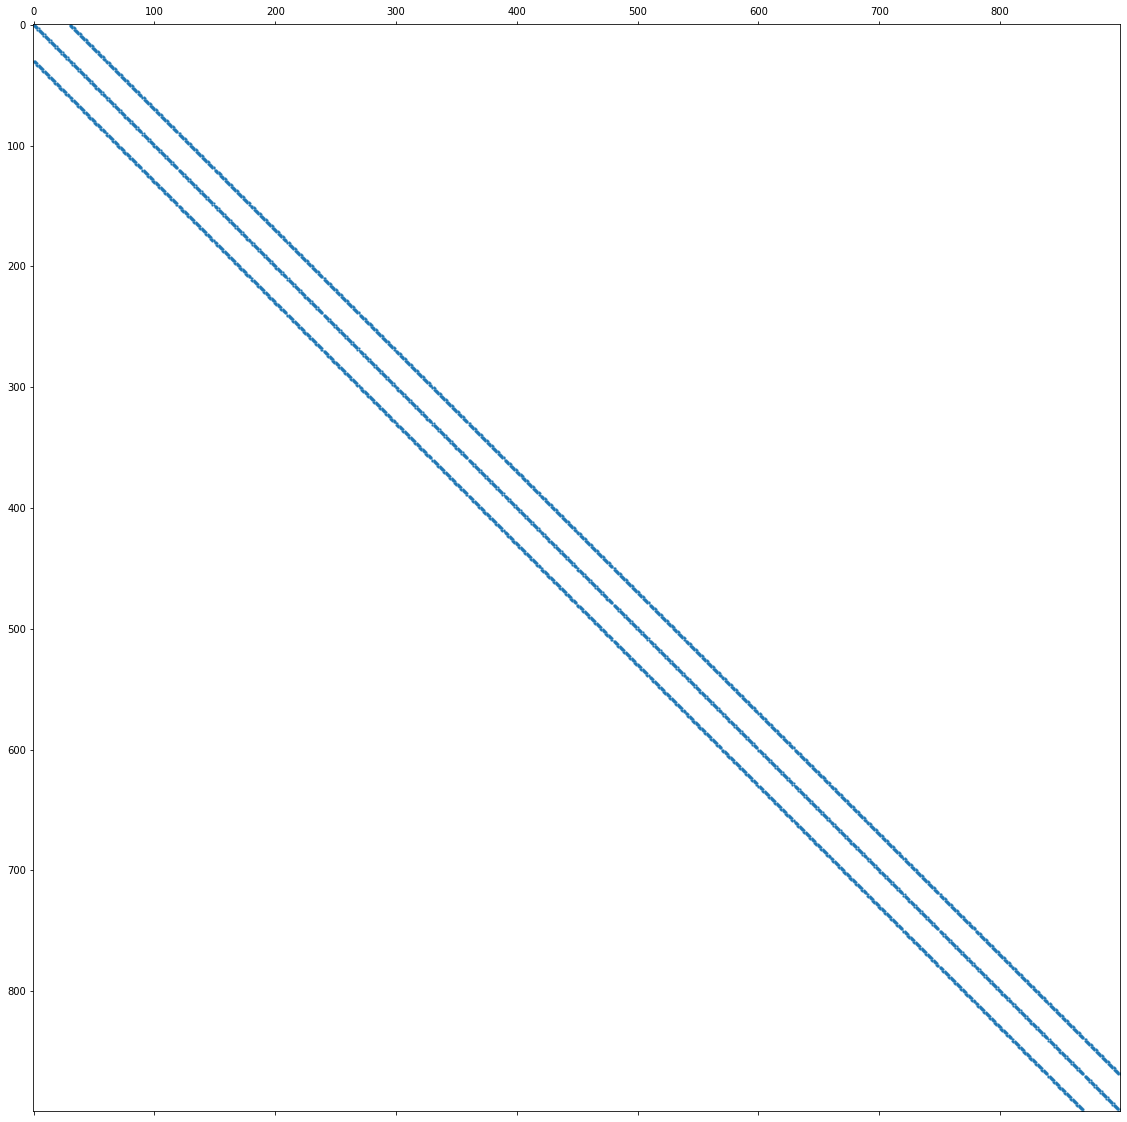

Erro Cholesky:  2.379479E+03 -> tempo: 0.02552843s
Erro QR      :  8.606031E+01 -> tempo: 0.00894213s
Erro Nativo  :  3.215648E-14 -> tempo: 0.00328493s


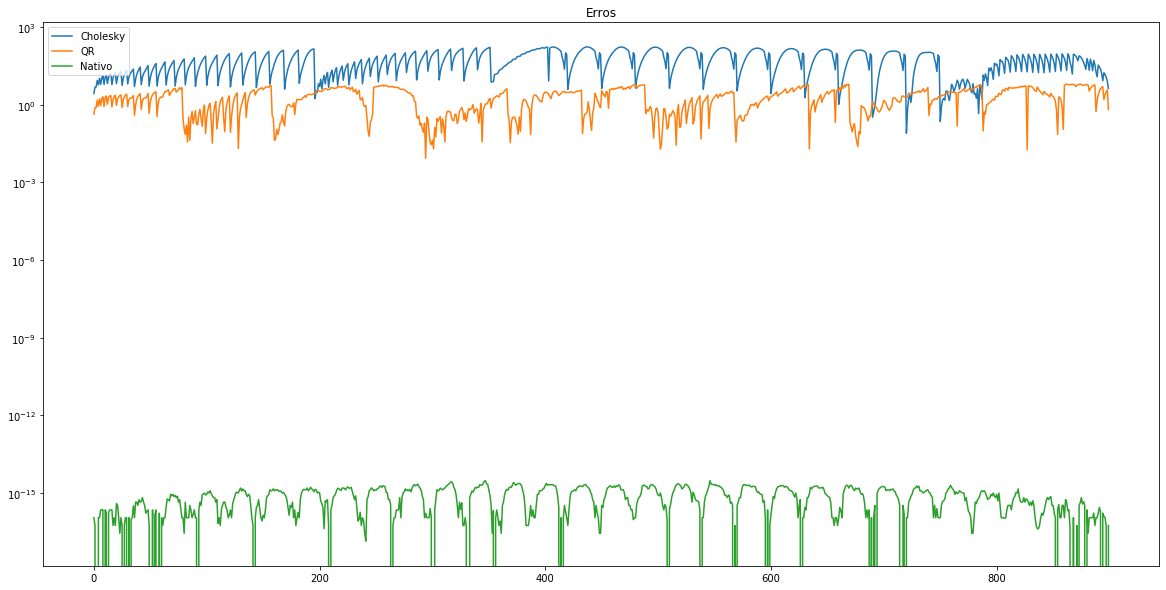

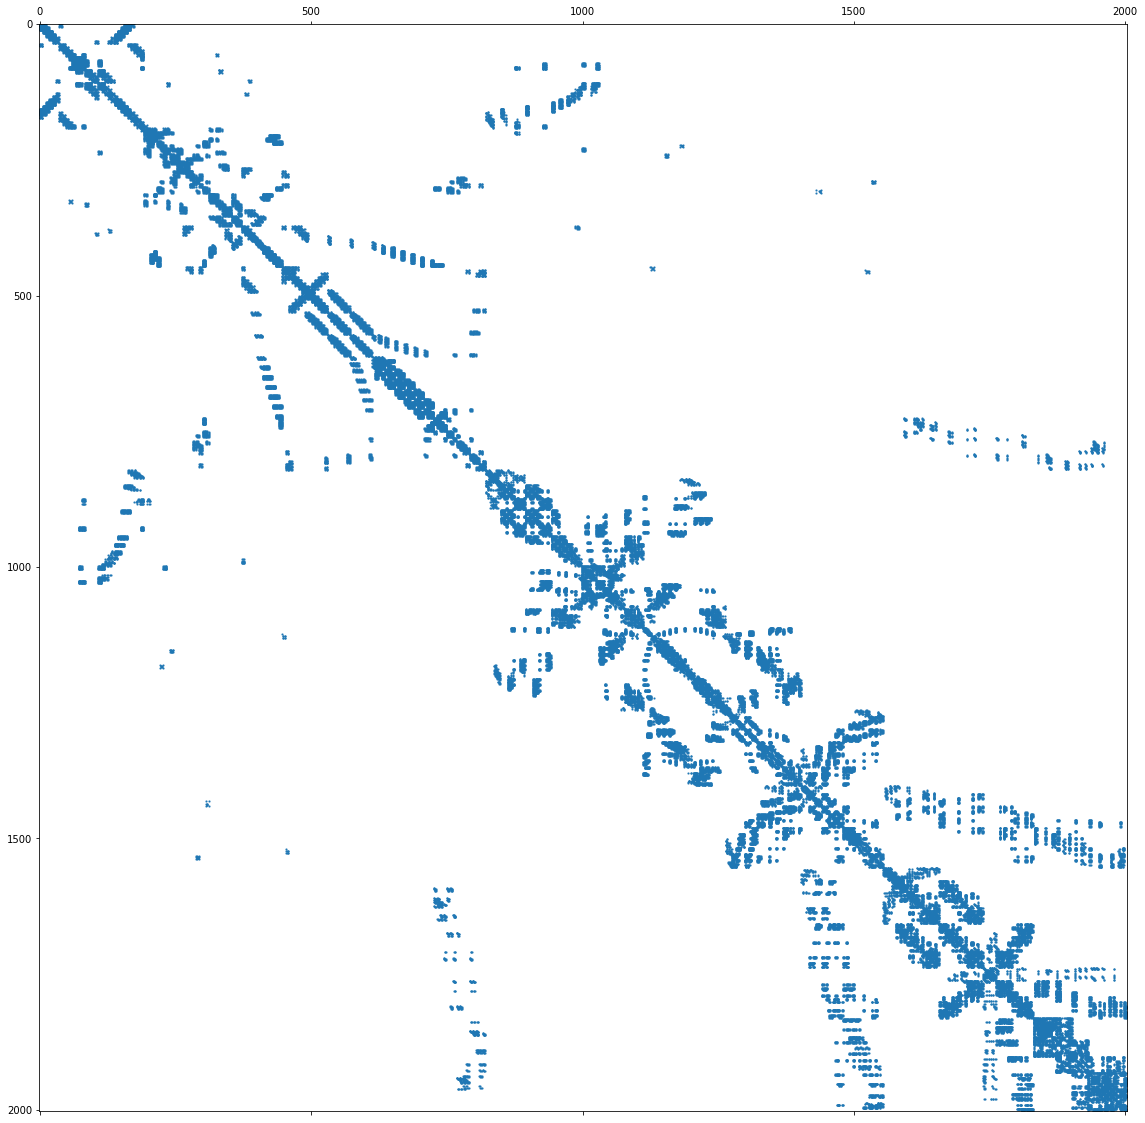

Erro Cholesky:  1.921042E+17 -> tempo: 0.99363470s
Erro QR      :  2.979049E+08 -> tempo: 0.56108785s
Erro Nativo  :  3.146621E-10 -> tempo: 0.22159410s


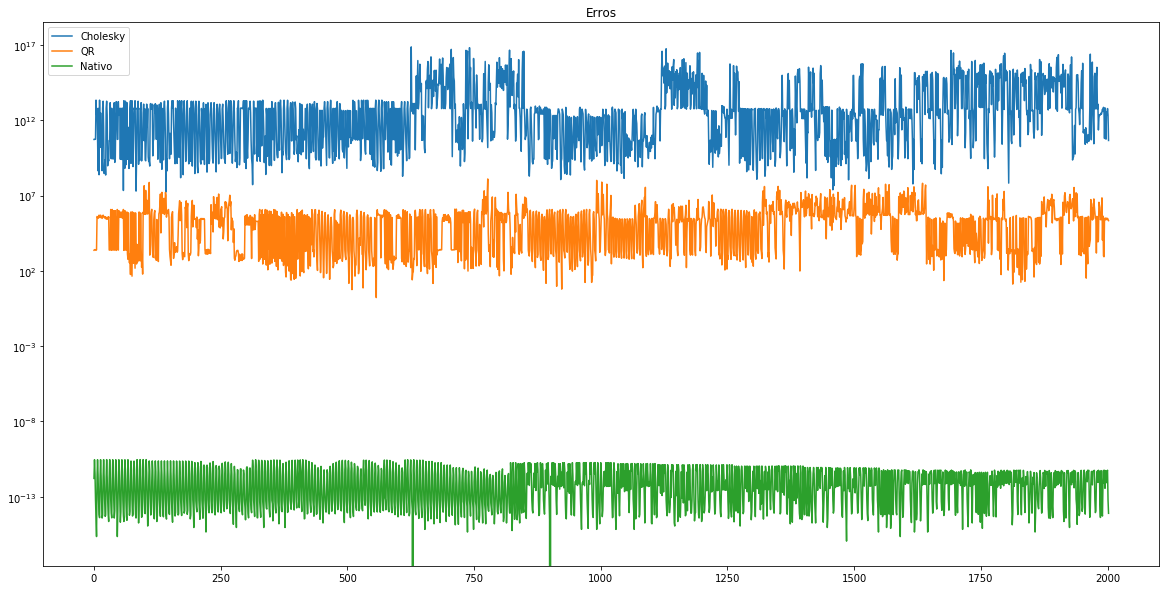

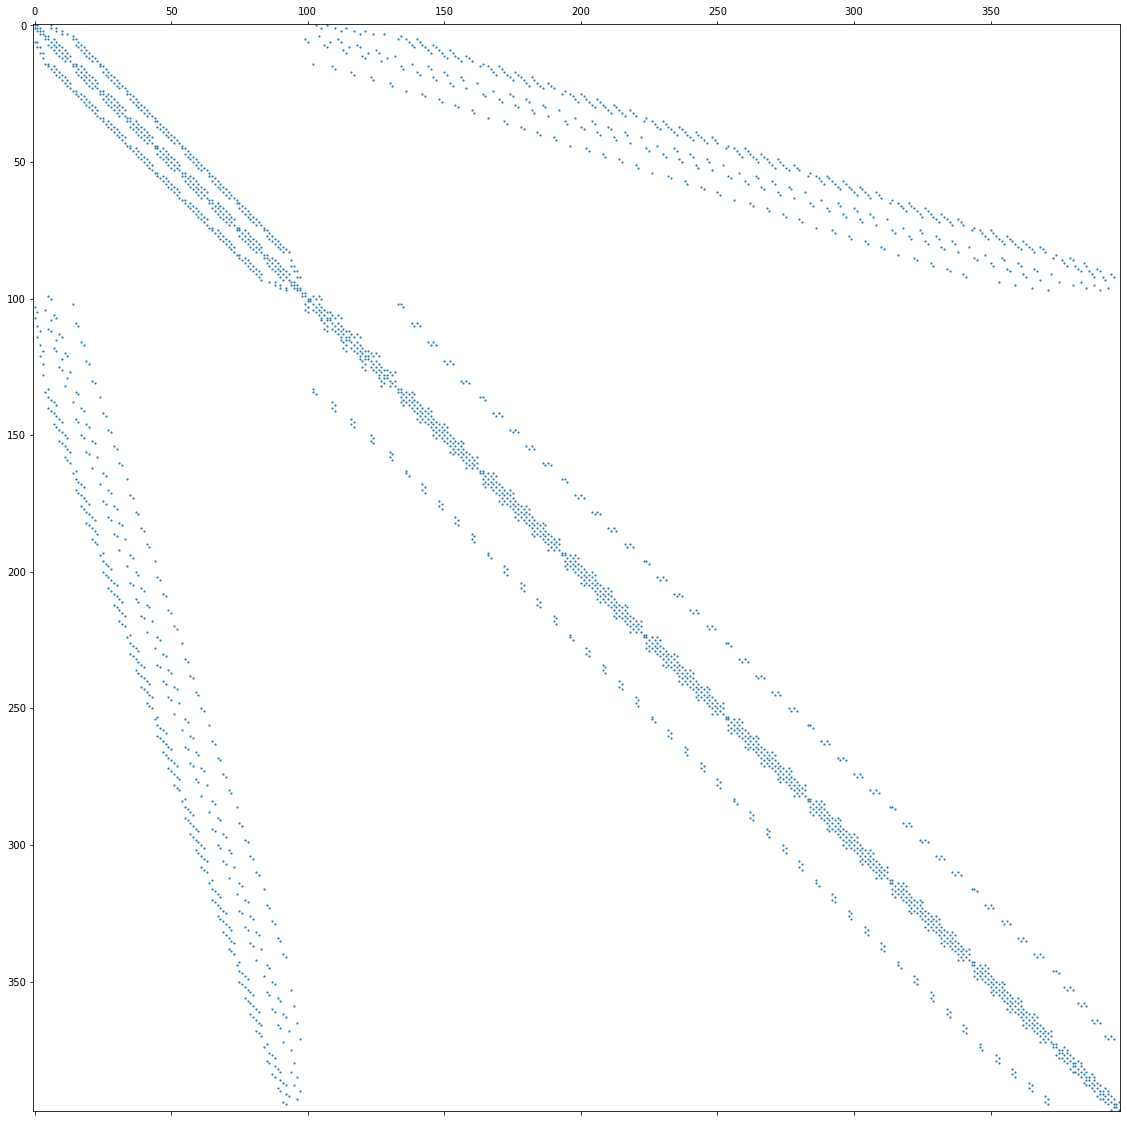

Erro Cholesky:  3.239389E+02 -> tempo: 0.00475240s
Erro QR      :  3.960031E+01 -> tempo: 0.00322747s
Erro Nativo  :  4.927836E-15 -> tempo: 0.00122333s


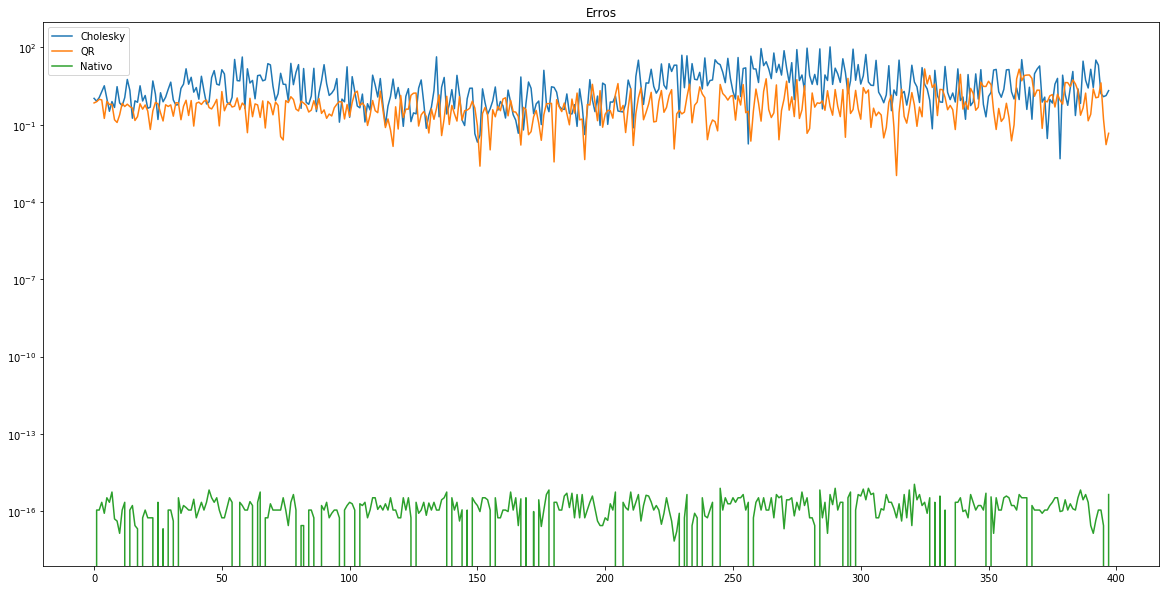

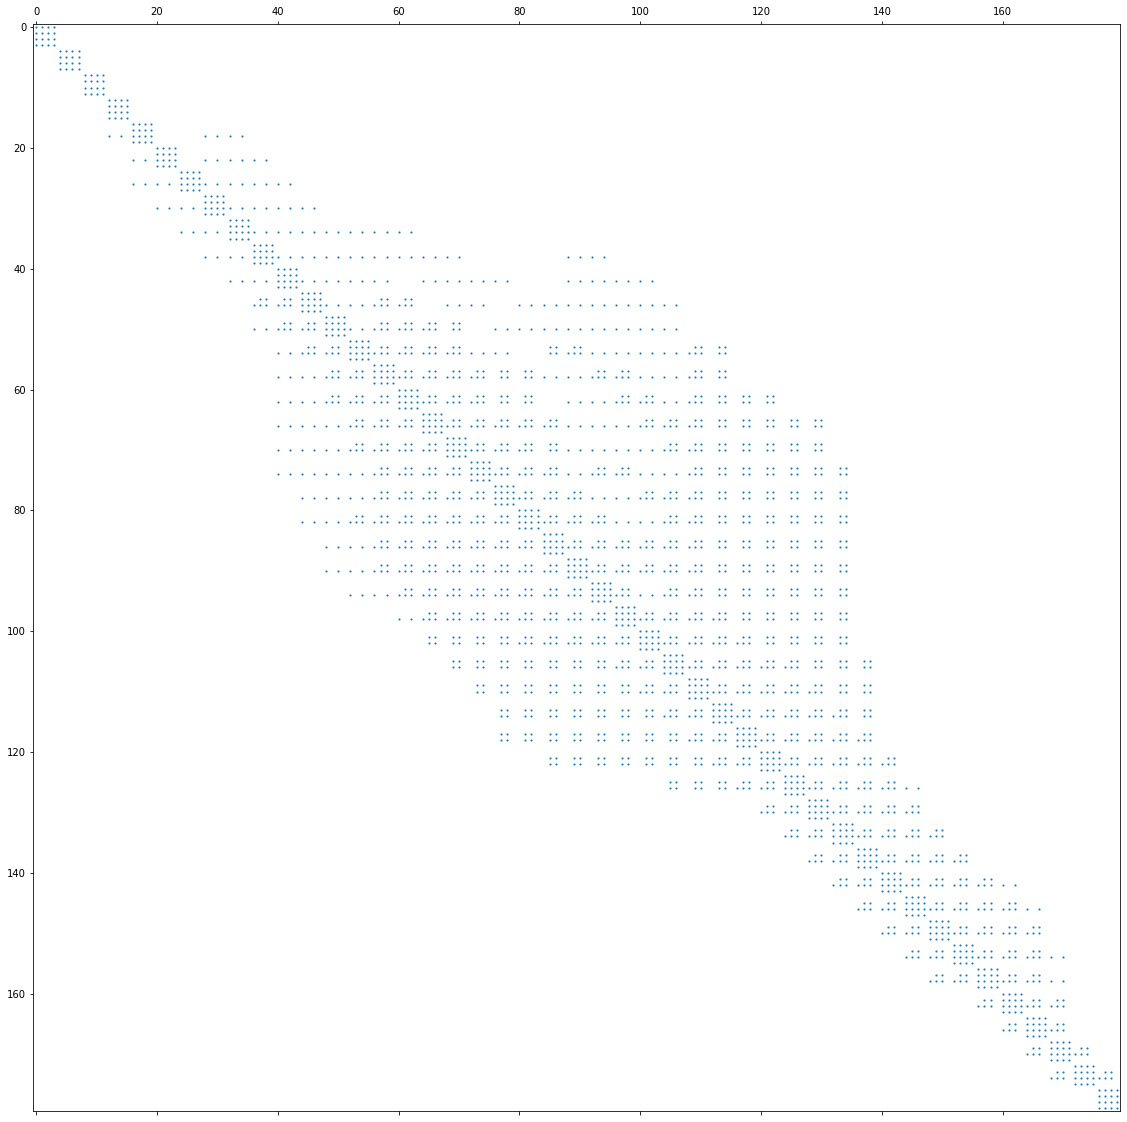

Erro Cholesky:  3.435298E+19 -> tempo: 0.00386405s
Erro QR      :  1.025373E+08 -> tempo: 0.00156260s
Erro Nativo  :  1.966067E-14 -> tempo: 0.00061679s


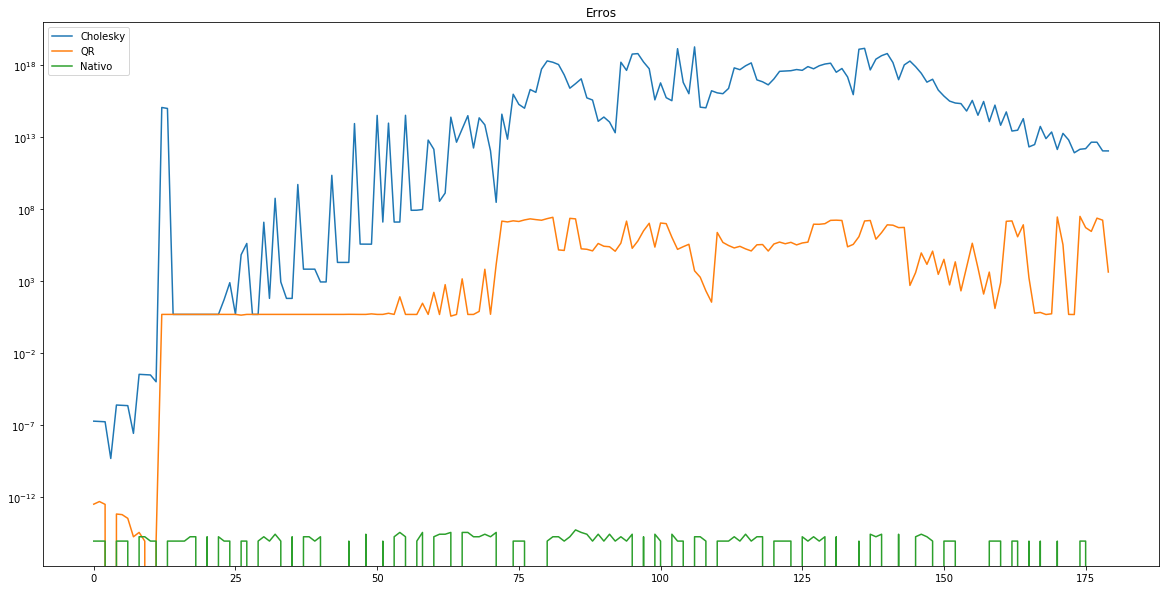

In [3]:
exibir([1,2,3,4,5])